In [1]:
#librerias necesarias para el proyecto.
import requests
import pandas as pd
import pdftables_api
from datetime import datetime, date, time, timedelta
import dateutil
import matplotlib.pyplot as plt

In [8]:
#fuente: https://www.valencia.es/ayuntamiento/maparuido.nsf/vDatosEstacionesWeb/Anyo2019?OpenDocument&bdOrigen=ayuntamiento%2Fmaparuido.nsf&idapoyo=&lang=1&nivel=5_3
#A continuación se relaciona la url a partir de la cual se van a extraer los datos de contaminación atmosférica en la estación
#de la Pista de Silla de la ciudad de Valencia (una de las principales vías de acceso a la ciudad)
url="http://mapas.valencia.es/WebsMunicipales/uploads/atmosferica/4A_diciembre2019.pdf"
url2="http://mapas.valencia.es/WebsMunicipales/uploads/atmosferica/4A.pdf"
resp=requests.get(url) #se almacena el resultado de la petición en la variable resp.
resp2020=requests.get(url2)
print(resp) #Nos muestra un valor  numérico que  nos informa con (200) que la petición se realizó de manera satisfactoria.
print(resp2020)


<Response [200]>
<Response [200]>


In [2]:
#Se establece la ruta donde se guardará el fichero recuperado de la página web.
path='C:\Datos_DW\TEMP\Datos_MEDIAMBIENTE'

In [11]:
#Guardamos la  información en un fichero en la ruta establecida.
with open(path+'\diciembre2019MA.pdf','wb') as output:
    output.write(resp.content)
with open(path+'\diciembre2020MA.pdf','wb') as output:
    output.write(resp2020.content)

In [13]:
#Después de descargar el pdf de la página web del ayuntamiento de Valencia
#a través de una API convertimos el pdf en csv
#Fuente https://pdftables.com/blog/pdf-to-excel-with-python

c = pdftables_api.Client('ew5eug062txo')
c.csv(path+'\diciembre2019MA.pdf', path+'\diciembre2019MA.csv') 
c.csv(path+'\diciembre2020MA.pdf', path+'\diciembre2020MA.csv')

In [ ]:
#TRANSFORMACIÓN DE LOS FICHEROS CSV CREADOS POR LA API.
#el csv devuelto por el API es transformado en el "query editor de Excel" 
#el fichero se incorpora al repositorio de ficheros de github:"fichero transformado por la API para 2020.xlsx" y 
#"fichero transformado por la APV para 2019.xlsx"
#Con el query editor de Excel se realizan los siguientes procesos sobre los ficheros comentados anteriormente:
#
#     - Desde Excel se procede a anexar los datos de las dos consultas. 
#     - eliminación de cualquier tipo de cabecera
#     - eliminación de cualquier linea en blanco.
#     - conversión a número de todos los valores.
#     - conversión del valor fecha a tipo fecha.
#     - conversión de cualquier valor tipo "null" a 0
#     - eliminación de todas las filas descriptivas.
#     
# Una vez realizada la transformación en el "Query Editor" guardamos el documento en un fichero
# csv como DatosMedioambientalesValencaNO2.csv
# El resto de manipulación se realizará en Python.

In [42]:
# se crea un Dataframe a partir de los datos del fichero DatosMedioambientalesValenciaNO2.csv
datos = pd.read_csv('C:\Datos_DW\TEMP\Datos_MEDIAMBIENTE\DatosMedioambienteValenciaNO2.csv',sep=";")

In [43]:
# visualizamos datos
datos.head(20)

,Fecha,"PM2,5\nμg/m3",Xileno\nμg/m3,SO 2\nμg/m3,CO\nmg/m3,NO\nμg/m3,N02,PM10\nμg/m3,NO x\nμg/m3,Ozono\nμg/m3,Tolueno\nμg/m3,Benceno\nμg/m3,Ruido\ndBA
0,01-01-19,15.0,"2,3",5.0,"0,4",30,44,25.0,91,17,"3,8","1,5",59.0
1,02-01-19,17.0,"4,3",6.0,"0,3",55,58,33.0,142,8,"6,9","1,9",60.0
2,03-01-19,18.0,"4,9",6.0,"0,3",53,59,34.0,140,7,"10,5","1,9",61.0
3,04-01-19,21.0,4,5.0,"0,3",41,53,35.0,115,10,"10,3","1,7",69.0
4,05-01-19,21.0,"2,2",5.0,"0,1",28,39,42.0,81,19,"5,1","1,3",NaN
5,06-01-19,19.0,"2,3",5.0,"0,2",37,47,40.0,103,17,"3,9","1,7",NaN
6,07-01-19,18.0,"5,6",9.0,"0,3",82,67,40.0,193,12,"9,7","2,6",NaN
7,08-01-19,23.0,7,6.0,NaN,58,60,39.0,148,12,"11,7","1,9",62.0
8,09-01-19,16.0,4,4.0,NaN,37,41,38.0,98,27,"9,1","1,2",59.0
9,10-01-19,7.0,"3,5",6.0,"0,3",28,46,23.0,88,39,"5,1","0,9",57.0


In [61]:
#Selecciono la columnas correspondientes a la fecha y al contaminante dióxido de nitrógeno.
datos_filtrados = datos.iloc[:,[0,6]]
#Renombro las etiquetas de los atributos
datos_filtrados.rename(columns={'Contaminante\nFecha': 'Fecha', 'NO 2\nμg/m3': 'NO2'}, inplace=True)
datos_filtrados['Fecha'] = datos_filtrados['Fecha'].apply(dateutil.parser.parse, dayfirst=True)

C:\Users\Juan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [62]:
#Extraigo de la fecha el mes y la semana del año
datos_filtrados['Any'] = pd.DatetimeIndex(datos_filtrados['Fecha']).year
datos_filtrados['Mes'] = pd.DatetimeIndex(datos_filtrados['Fecha']).month
datos_filtrados['Sem'] = pd.DatetimeIndex(datos_filtrados['Fecha']).weekofyear



C:\Users\Juan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Juan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Juan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [63]:
datos_filtrados.sort_values(by="Fecha")

,Fecha,N02,Any,Mes,Sem
0,2019-01-01,44,2019,1,1
1,2019-01-02,58,2019,1,1
2,2019-01-03,59,2019,1,1
3,2019-01-04,53,2019,1,1
4,2019-01-05,39,2019,1,1
...,...,...,...,...,...
420,2020-02-25,46,2020,2,9
421,2020-02-26,46,2020,2,9
422,2020-02-27,30,2020,2,9
423,2020-02-28,33,2020,2,9


In [70]:
#Realizo dos dataframes. Uno agrupado por meses y otro agrupado por semanas
grupo_mes=datos_filtrados.groupby(['Any','Mes']).agg({'N02':'mean'})
grupo_semana=datos_filtrados.groupby(['Any','Sem']).agg({'N02':'mean'})

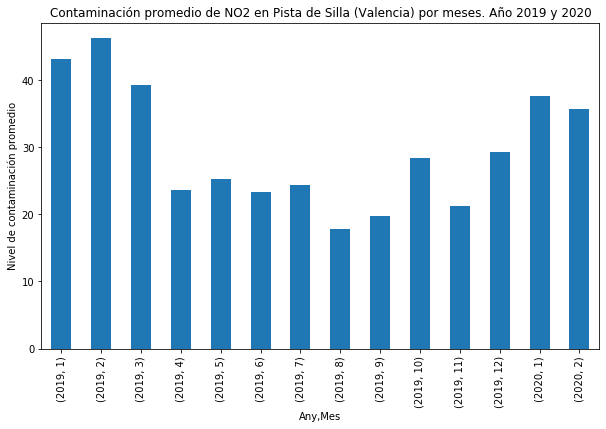

In [68]:
#Generamos un gráfico de barras con la contaminación por meses.
plt.figure(figsize=(10,6))
grupo_mes.N02.plot(kind='bar')
plt.title('Contaminación promedio de NO2 en Pista de Silla (Valencia) por meses. Año 2019 y 2020')
plt.ylabel('Nivel de contaminación promedio')
plt.show()

Text(0.5, 0, 'Número de semana del año')

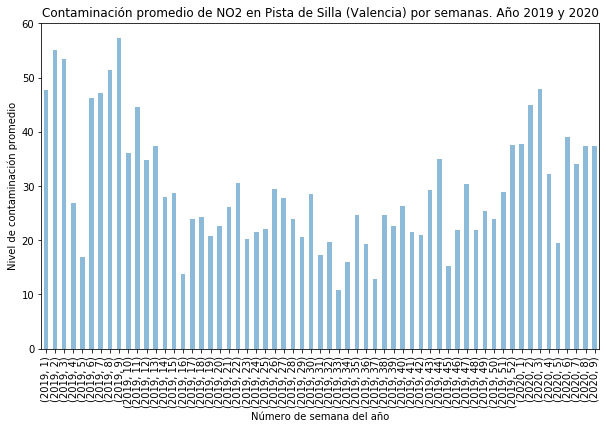

In [72]:
#Generamos un gráfico de barras con la contaminación por semanas.
plt.figure(figsize=(10,6))
grupo_semana.N02.plot(kind='bar', alpha=0.5)
plt.title('Contaminación promedio de NO2 en Pista de Silla (Valencia) por semanas. Año 2019 y 2020')
plt.ylabel('Nivel de contaminación promedio')
plt.xlabel('Número de semana del año')
